<a href="https://colab.research.google.com/github/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/blob/master/MN_HomelessShelter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Import shelter data from Github: sdfgsfgsdfgds

#df17=pd.read_csv('daily-shelter-occupancy-2017-csv.csv')
#df18=pd.read_csv('daily-shelter-occupancy-2018-csv.csv')
#df19=pd.read_csv('daily-shelter-occupancy-2019-csv.csv')

path = 'https://raw.githubusercontent.com/VernonNaidoo-Toronto/Understanding-Toronto-Shelters/master/Shelter%20Data/'
df17=pd.read_csv(path + 'daily-shelter-occupancy-2017-csv.csv')
df18=pd.read_csv(path + 'daily-shelter-occupancy-2018-csv.csv')
df19=pd.read_csv(path + 'daily-shelter-occupancy-2019-csv.csv')

In [ ]:
df=pd.concat([df17,df18,df19])
df

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,39442,2019-12-31T00:00:00,YWCA Toronto,YWCA-348 Davenport,348 Davenport Rd.,Toronto,ON,M5R 1K6,YWCA - 348 Davenport Road Youth,YWCA Davenport - Youth,Youth,15,15.0
39442,39443,2019-12-31T00:00:00,Youth Without Shelter,Youth Without Shelter,6 Warrendale Court,Etobicoke,ON,M9V 1P9,Youth w/o Shelter Emerg Shelter,Youth without Shelter Emergency Shelter Program,Youth,33,33.0
39443,39444,2019-12-31T00:00:00,Youth Without Shelter,Youth Without Shelter,6 Warrendale Court,Etobicoke,ON,M9V 1P9,Youth w/o Shltr Transitional Res,Youth without Shelter Stay In School Program,Youth,20,20.0
39444,39445,2019-12-31T00:00:00,YouthLink,YouthLink Shelter,747 Warden Ave,Toronto,ON,M1L 4A1,YouthLink - 747 Warden Ave,YouthLink Emergency Program,Co-ed,9,10.0


In [ ]:
df.isnull().sum()

_id                       0
OCCUPANCY_DATE            0
ORGANIZATION_NAME         0
SHELTER_NAME              0
SHELTER_ADDRESS           0
SHELTER_CITY              0
SHELTER_PROVINCE          0
SHELTER_POSTAL_CODE    5494
FACILITY_NAME             0
PROGRAM_NAME              0
SECTOR                    0
OCCUPANCY                 0
CAPACITY                343
dtype: int64

In [ ]:
df['SHELTER_CITY'].unique()

array(['Toronto', 'North York', 'Scarborough', 'Etobicoke'], dtype=object)

In [ ]:
df['SECTOR'].unique()

array(['Co-ed', 'Men', 'Families', 'Women', 'Youth'], dtype=object)

In [ ]:
df['SHELTER_NAME'].unique().size

65

In [ ]:
import datetime
df['Month_Year']=pd.to_datetime(df['OCCUPANCY_DATE']).dt.to_period('M')
df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY,Month_Year
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0,2017-01
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0,2017-01
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0,2017-01
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0,2017-01
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0,2017-01


Text(0, 0.5, 'OCCUPANCY')

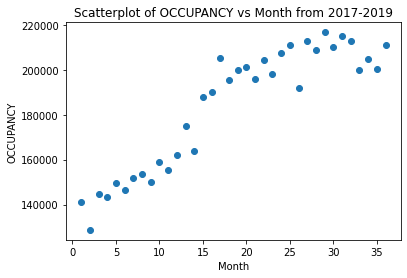

In [ ]:
x=list(range(1,37))
y=df[['OCCUPANCY','Month_Year']].groupby('Month_Year').sum()['OCCUPANCY']
plt.scatter(x,y)
plt.title('Scatterplot of OCCUPANCY vs Month from 2017-2019')
plt.xlabel('Month')
plt.ylabel('OCCUPANCY')

Text(0, 0.5, 'CAPACITY')

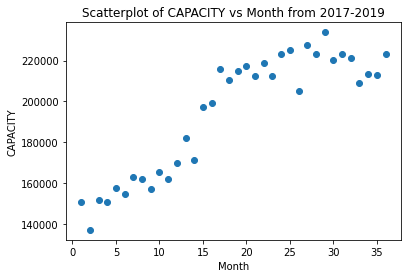

In [ ]:
x=list(range(1,37))
y=df[['CAPACITY','Month_Year']].groupby('Month_Year').sum()['CAPACITY']
plt.scatter(x,y)
plt.title('Scatterplot of CAPACITY vs Month from 2017-2019')
plt.xlabel('Month')
plt.ylabel('CAPACITY')

In [ ]:
df['delta']=df['OCCUPANCY']-df['CAPACITY']
df.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY,Month_Year,delta
0,1,2017-01-01T00:00:00,COSTI Immigrant Services,COSTI Reception Centre,100 Lippincott Street,Toronto,ON,M5S 2P1,COSTI Reception Centre,COSTI Reception Ctr CITY Program,Co-ed,16,16.0,2017-01,0.0
1,2,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Extreme Weather Program,Men,13,17.0,2017-01,-4.0
2,3,2017-01-01T00:00:00,Christie Ossington Neighbourhood Centre,Christie Ossington Men's Hostel,973 Lansdowne Avenue,Toronto,ON,M6H 3Z5,Christie Ossington Men's Hostel,Christie Ossington Men's Hostel,Men,63,63.0,2017-01,0.0
3,4,2017-01-01T00:00:00,"Christie Refugee Welcome Centre, Inc.",Christie Refugee Welcome Centre,43 Christie Street,Toronto,ON,M6G 3B1,Christie Refugee Welcome Centre,Christie Refugee Welcome Ctr - Settlement and ...,Families,66,70.0,2017-01,-4.0
4,5,2017-01-01T00:00:00,City of Toronto,Birchmount Residence,1673 Kingston Road,Toronto,ON,NaN,Birchmount Res 1673 Kingston Rd,Birchmount Residence,Men,58,60.0,2017-01,-2.0


In [ ]:
#creat a df for enteries which have overcapacity
df_over = df[df['delta'] > 0]
df_over.head()

,_id,OCCUPANCY_DATE,ORGANIZATION_NAME,SHELTER_NAME,SHELTER_ADDRESS,SHELTER_CITY,SHELTER_PROVINCE,SHELTER_POSTAL_CODE,FACILITY_NAME,PROGRAM_NAME,SECTOR,OCCUPANCY,CAPACITY,Month_Year,delta
5,6,2017-01-01T00:00:00,City of Toronto,Birkdale Residence,1229 Ellesmere Road,Toronto,ON,M1P 4V8,Birkdale Residence,Birkdale Residence - Bedded Program,Families,168,160.0,2017-01,8.0
8,9,2017-01-01T00:00:00,City of Toronto,Family Residence,4222 Kingston Road,Toronto,ON,M1E 2M6,Family Residence - AL site,Family Residence - AL Site (Internal Referral ...,Families,8,0.0,2017-01,8.0
14,15,2017-01-01T00:00:00,City of Toronto,Family Residence,4222 Kingston Road,Toronto,ON,M1E 2M6,Family Residence - Main Building,Family Residence - Main,Families,148,110.0,2017-01,38.0
16,17,2017-01-01T00:00:00,City of Toronto,Family Residence,4222 Kingston Road,Toronto,ON,M1E 2M6,Family Residence - TO,Family Residence - TO site (Internal Referral ...,Families,60,20.0,2017-01,40.0
20,21,2017-01-01T00:00:00,City of Toronto,Robertson House,291 Sherbourne Street,Toronto,ON,M5A 2R9,Robertson House,Robertson House - MAIN Program,Families,111,90.0,2017-01,21.0


Text(0, 0.5, 'OVERCAPACITY')

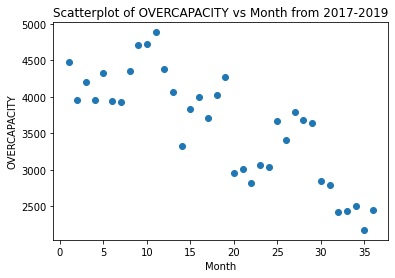

In [ ]:
x=list(range(1,37))
y=df_over[['delta','Month_Year']].groupby('Month_Year').sum()['delta']
plt.scatter(x,y)
plt.title('Scatterplot of OVERCAPACITY vs Month from 2017-2019')
plt.xlabel('Month')
plt.ylabel('OVERCAPACITY')